In [72]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [44]:
HP=pd.read_csv('brooklyn_sales_map.csv')

In [45]:
pd.set_option('display.max_columns', 111)
HP.shape

(390883, 111)

In [46]:
HP.head()

,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_sqft,gross_sqft,year_built,tax_class_at_sale,building_class_at_sale,sale_price,sale_date,year_of_sale,Borough,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCent,HealthArea,SanitBoro,SanitDistr,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
0,1,3,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,140,1001,NaN,R5,330 JAY STREET,COURT,11201,0,1,1,0.0,0.0,2002,4,R5,499401179.0,2008-04-23,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,DOWNTOWN-FULTON FERRY,29 COMMERCIAL GARAGES,4,54,1,NaN,G7,85 JAY STREET,NaN,11201,0,0,0,134988.0,0.0,0,4,G7,345000000.0,2016-12-20,2016,BK,302.0,21.00,3017.0,13.0,33.0,11201.0,L118,84.0,36.0,1000.0,3.0,2.0,1B,87 JAY STREET,M1-2/R8,NaN,NaN,NaN,NaN,NaN,MX-2,NaN,NaN,NaN,N,G7,10.0,0.0,P,85 JAY STREET BROOKLY,134988.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,490.50,275.33,0.0,0.00,NaN,0.0,N,5.0,5.0,1571850.0,1571850.0,1571850.0,1571850.0,0.0,0.0,0.0,NaN,NaN,0.00,7.20,2.0,6.5,3.0,3.000540e+09,0.0,21.0,988208.0,195011.0,12d,NaN,302 016,30101.0,NaN,3.000540e+09,12/06/2002,1.0,NaN,NaN,17V1.1,0.0,1559.889144,140131.577176
2,3,3,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,204,1,NaN,O6,29 COLUMBIA HEIGHTS,NaN,11201,0,0,0,32000.0,304650.0,1924,4,O6,340000000.0,2016-08-03,2016,BK,302.0,1.00,1003.0,13.0,33.0,11201.0,E205,84.0,38.0,2300.0,3.0,2.0,1A,29 COLUMBIA HEIGHTS,M2-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,O6,5.0,0.0,NaN,25-30 COLUMBIA HEIGHT,32000.0,304650.0,304650.0,0.0,264750.0,0.0,0.0,0.0,0.0,39900.0,2.0,1.0,13.0,0.0,0.0,92.42,335.92,335.0,92.00,NaN,0.0,Y,3.0,5.0,1548000.0,25463250.0,0.0,0.0,1924.0,1980.0,0.0,NaN,NaN,9.52,0.00,2.0,0.0,3.0,3.002040e+09,0.0,1.0,985952.0,195007.0,12d,NaN,302 004,30106.0,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,890.718521,34656.447240
3,4,3,MILL BASIN,22 STORE BUILDINGS,4,8470,55,NaN,K6,5120 AVENUE U,NaN,11234,0,123,123,905000.0,2548000.0,1970,4,K6,276947000.0,2012-11-28,2012,BK,318.0,698.00,2005.0,22.0,46.0,11234.0,E323,63.0,35.0,8822.0,3.0,18.0,4E,5120 AVENUE U,M3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,K6,5.0,1.0,NaN,BROOKLYN KINGS PLAZA,905000.0,2548000.0,2548000.0,0.0,0.0,1263000.0,1285000.0,0.0,0.0,0.0,2.0,4.0,2.0,0.0,123.0,930.00,859.00,0.0,0.00,NaN,0.0,Y,3.0,5.0,36532350.0,149792400.0,0.0,0.0,1970.0,0.0,0.0,NaN,NaN,2.82,0.00,2.0,0.0,3.0,3.084700e+09,0.0,698.0,1006597.0,161424.0,23b,NaN,319 077,32502.0,NaN,0.000000e+00,NaN,1.0,1.0,1.0,17V1.1,0.0,3729.786857,797554.847834
4,5,3,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,230,1,NaN,H8,21 CLARK STREET,NaN,11201,0,1,1,20267.0,356000.0,1927,4,H8,202500000.0,2017-10-31,2017,BK,302.0,3.01,2000.0,13.0,33.0,11201.0,E205,84.0,38.0,2300.0,3.0,2.0,1A,79 WILLOW STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LH-1,N,H8,8.0,0.0,X,WATCHTOWER C/O REAL P,20267.0,356000.0,30000.0,0.0,30000.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,15.0,0.0,1.0,202.00,100.33,202.0,100.33,NaN,0.0,N,3.0,2.0,2250000.0,27166050.0,225

In [47]:
HP.describe().append(HP.isnull().sum().rename('isnull'))

,Unnamed: 0,borough,block,lot,easement,zip_code,residential_units,commercial_units,total_units,land_sqft,gross_sqft,year_built,tax_class_at_sale,sale_price,year_of_sale,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,PolicePrct,HealthCent,HealthArea,SanitBoro,SanitDistr,LandUse,Easements,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,ProxCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,TaxMap,APPBBL,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area,APPDate,Address,BldgClass,Borough,EDesigNum,Ext,FireComp,HistDist,IrrLotCode,Landmark,LtdHeight,Overlay1,Overlay2,OwnerName,OwnerType,SPDist1,SPDist2,SPDist3,Sanborn,SanitSub,SplitZone,Version,ZMCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,address,apartment_number,building_class,building_class_at_sale,building_class_category,neighborhood,sale_date,tax_class
count,390883.000000,390883.0,390883.000000,390883.000000,0.0,390883.000000,390883.000000,390883.000000,390883.000000,3.908830e+05,3.908830e+05,390883.000000,390883.000000,3.908830e+05,390883.000000,303728.000000,303436.000000,302515.000000,303688.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303238.000000,303238.000000,302711.000000,303728.000000,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303706.000000,303706.000000,303706.000000,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.0,3.037280e+05,303728.000000,303728.000000,3.037280e+05,303728.000000,303710.000000,3.037280e+05,303728.000000,8653.0,27773.0,303728.000000,303728.000000,3.037280e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,195442.000000,3.0,4275.651169,272.509986,NaN,11208.429087,2.486138,0.174142,2.673227,2.368464e+03,2.970877e+03,1701.666307,1.642660,5.067545e+05,2009.478243,309.783211,492.221200,1971.065160,19.089803,40.888522,11207.063718,71.830012,34.460293,5758.185060,3.000326,9.776390,2.188791,0.007049,8.459416e+03,2.361238e+04,1.207292e+03,2.221657e+04,1.584349e+02,2.743297e+02,2.489965e+02,1.156844e+02,1.732853e+02,209.225606,2.086038,1.314824,3.102166,22.082923,22.347620,53.086843,109.695027,39.399567,59.381591,1.566637,4.742886,2.439326,1.209784e+05,7.813468e+05,4.136623e+04,8.105911e+04,1879.716700,295.778483,34.019662,1.662472,1.828681,0.153269,2.854437,3.0,3.045066e+09,0.029987,4715.545455,9.921077e+05,175146.073694,31396.728152,1.927884e+08,1.000145,1.0,1.0,0.000244,337.445796,8.645885e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,112838.346973,0.0,2642.765332,484.658837,NaN,361.207836,48.200178,1.653362,48.233343,2.509129e+04,1.453960e+04,636.764362,0.906378,2.353965e+06,4.504907,5.457593,331.650433,992.300369,4.221940,4.648494,382.456905,8.632760,2.514558,2576.513859,0.019130,5.455605,1.912236,0.086297,3.140562e+04,8.164505e+04,1.307823e+04,7.949109e+04,4.274347e+03,3.486221e+03,5.525525e+03,5.206794e+03,5.201557e+03,4586.906650,0.560690,2.247752,2.927788,79.764423,79.954151,99.398538,63.857962,56.369625,43.217604,1.206424,0.701608,1.559428,7.152424e+05,3.227031e+06,2.495788e+05,1.524291e+06,317.759012,710.334178,259.086380,1.549262,1.139002,0.811046,1.428735,0.0,2.571172e+07,8.840051,17545.128104,7.391759e+04,18390.569903,754.905314,7.409608e+08,0.017021,0.0,0.0,0.036740,329.587401,3.116106e+04,NaN,NaN,NaN,NaN,NaN,NaN

In [48]:
HP.columns.values

array(['Unnamed: 0', 'borough', 'neighborhood', 'building_class_category',
       'tax_class', 'block', 'lot', 'easement', 'building_class',
       'address', 'apartment_number', 'zip_code', 'residential_units',
       'commercial_units', 'total_units', 'land_sqft', 'gross_sqft',
       'year_built', 'tax_class_at_sale', 'building_class_at_sale',
       'sale_price', 'sale_date', 'year_of_sale', 'Borough', 'CD',
       'CT2010', 'CB2010', 'SchoolDist', 'Council', 'ZipCode', 'FireComp',
       'PolicePrct', 'HealthCent', 'HealthArea', 'SanitBoro',
       'SanitDistr', 'SanitSub', 'Address', 'ZoneDist1', 'ZoneDist2',
       'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2', 'SPDist1',
       'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea',
       'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea',
       'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource',
       'NumBldgs', 'NumFloors

In [49]:
columns = ['Unnamed: 0', 'borough', 'Borough','apartment_number', 'Ext', 'Landmark','AreaSource', 'UnitsRes', 'UnitsTotal', 'LotArea', 'BldgArea','BldgClass','Easements', 'easement', 'OwnerType', 'building_class_category','sale_date', 'CT2010', 'CB2010', 'ZipCode', 'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'YearBuilt', 'BoroCode', 'BBL', 'Tract2010', 'ZoneMap', 'ZMCode', 'Sanborn', 'TaxMap', 'EDesigNum', 'PLUTOMapID', 'FIRM07_FLA', 'PFIRM15_FL', 'Version', 'MAPPLUTO_F', 'APPBBL', 'APPDate', 'SHAPE_Leng', 'SHAPE_Area','CD', 'SchoolDist', 'Council', 'PolicePrct', 'HealthCent', 'SanitBoro', 'SanitDistr','FireComp','SanitSub', 'CondoNo','Address']
HP.drop(columns, inplace=True, axis=1)

In [50]:
HP.columns.values

array(['neighborhood', 'tax_class', 'block', 'lot', 'building_class',
       'address', 'zip_code', 'residential_units', 'commercial_units',
       'total_units', 'land_sqft', 'gross_sqft', 'year_built',
       'tax_class_at_sale', 'building_class_at_sale', 'sale_price',
       'year_of_sale', 'HealthArea', 'SplitZone', 'LandUse', 'OwnerName',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'NumBldgs', 'NumFloors',
       'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'ProxCode',
       'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand', 'AssessTot',
       'ExemptLand', 'ExemptTot', 'YearAlter1', 'YearAlter2', 'HistDist',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'XCoord', 'YCoord'],
      dtype=object)

In [51]:
HP=HP[HP['sale_price']!=0]
HP['gross_sqft']=HP['gross_sqft'].replace(0.0,HP['gross_sqft'].median())
HP['land_sqft']=HP['land_sqft'].replace(0.0,HP['land_sqft'].median())
HP['NumBldgs']= HP['NumBldgs'].fillna(HP['NumBldgs'].median())
HP['NumFloors']= HP['NumFloors'].fillna(HP['NumFloors'].median())
HP['ProxCode']= HP['ProxCode'].fillna(HP['ProxCode'].mode()[0])
HP['LotType']= HP['LotType'].fillna(HP['LotType'].mode()[0])
HP['BsmtCode']= HP['BsmtCode'].fillna(HP['BsmtCode'].mode()[0])
HP['LandUse']= HP['LandUse'].fillna(HP['LandUse'].mode()[0])
HP['AssessLand']= HP['AssessLand'].fillna(HP['AssessLand'].median())
HP['AssessTot']= HP['AssessTot'].fillna(HP['AssessTot'].median())
HP['ExemptLand']= HP['ExemptLand'].fillna(HP['ExemptLand'].median())
HP['ExemptTot']= HP['ExemptTot'].fillna(HP['ExemptTot'].median())
HP['BuiltFAR']= HP['BuiltFAR'].fillna(HP['BuiltFAR'].median())
HP['ResidFAR']= HP['ResidFAR'].fillna(HP['ResidFAR'].median())
HP['CommFAR']= HP['CommFAR'].fillna(HP['CommFAR'].median())
HP['FacilFAR']= HP['FacilFAR'].fillna(HP['FacilFAR'].mean())
HP['OwnerName']= HP['OwnerName'].fillna(value=0)
HP['IrrLotCode']= HP['IrrLotCode'].fillna(value=0)
HP['SplitZone']= HP['SplitZone'].fillna(value=0)


In [52]:
HP['XCoord']= HP['XCoord'].fillna(HP['XCoord'].mode()[0])
HP['YCoord']= HP['YCoord'].fillna(HP['YCoord'].mode()[0])
HP['XCoord']= HP['XCoord'].replace(0.0,HP['XCoord'].mode()[0] )
HP['YCoord']= HP['YCoord'].replace(0.0,HP['YCoord'].mode()[0] )


In [53]:
HP['ComArea']= HP['ComArea'].fillna(HP['ComArea'].median())
HP['ResArea']= HP['ResArea'].fillna(HP['ResArea'].median())
HP['OfficeArea']= HP['OfficeArea'].fillna(HP['OfficeArea'].median())
HP['RetailArea']= HP['RetailArea'].fillna(HP['RetailArea'].median())
HP['GarageArea']= HP['GarageArea'].fillna(HP['GarageArea'].median())
HP['OtherArea']= HP['OtherArea'].fillna(HP['OtherArea'].median())
HP['StrgeArea']= HP['StrgeArea'].fillna(HP['StrgeArea'].median())
HP['FactryArea']= HP['FactryArea'].fillna(HP['FactryArea'].median())
HP['LotFront']= HP['LotFront'].fillna(HP['LotFront'].median())
HP['LotDepth']= HP['LotDepth'].fillna(HP['LotDepth'].median())
HP['BldgFront']= HP['BldgFront'].fillna(HP['BldgFront'].median())
HP['BldgDepth']= HP['BldgDepth'].fillna(HP['BldgDepth'].median())
HP['HealthArea']= HP['HealthArea'].fillna(HP['HealthArea'].median())
HP['YearAlter1']= HP['YearAlter1'].fillna(HP['YearAlter1'].mode()[0])
HP['YearAlter2']= HP['YearAlter2'].fillna(HP['YearAlter2'].mode()[0])

In [54]:
HP['HistDist'].fillna(0.0, inplace=True)
HP['HistDist']=HP['HistDist'].astype('category')
HP['HistDist']=HP['HistDist'].cat.codes
HP['HistDist'].unique()

array([ 0,  8,  6, 11, 15, 13, 28, 24, 16, 27, 17, 12, 29, 30, 14,  4, 19,
       22,  7, 23,  5,  9, 32, 33,  3, 34, 31, 18, 25, 21, 35, 26, 20, 10,
        1,  2], dtype=int64)

In [55]:
HP['neighborhood']=HP['neighborhood'].astype('category')
HP['neighborhood']=HP['neighborhood'].cat.codes

In [56]:
HP[['number','street name']] = HP['address'].str.split(n=1, expand=True)
del HP['address']
del HP['number']
HP['street name']=HP['street name'].astype('category')
HP['street name']=HP['street name'].cat.codes

In [57]:
print(HP['tax_class'].unique())
print(HP['tax_class'].isnull().sum())
print(HP['tax_class_at_sale'].unique())
print(HP['tax_class_at_sale'].isnull().sum())
HP['tax_class'] = HP['tax_class'].map({'1B': 5, '2A': 6, '2B':7, '1A':8, '2C':9, '3':3,'4':4,'2':2,'1':1})
HP['tax_class'].fillna(HP['tax_class_at_sale'], inplace=True)

['4' '2' '1B' nan '2A' '2B' '1' '1A' '2C' '1C' '3']
3560
[4 2 1 3]
0


In [58]:
HP['building_class'].fillna(HP['building_class_at_sale'], inplace=True)
HP['building_class']=HP['building_class'].astype('category')
HP['building_class_at_sale']=HP['building_class_at_sale'].astype('category')

cat_columns = HP.select_dtypes(['category']).columns
cat_columns
HP[cat_columns] = HP[cat_columns].apply(lambda x: x.cat.codes)

In [59]:
print(HP['OwnerName'].unique())
HP['OwnerName']= HP['OwnerName'].fillna(value=0)
print(HP['OwnerName'].isnull().sum())

HP['OwnerName']=HP['OwnerName'].astype('category')
HP['OwnerName']=HP['OwnerName'].cat.codes

[0 '85 JAY STREET BROOKLY' '25-30 COLUMBIA HEIGHT' ... 'OCHOA, ELEODORO A'
 'ROVITO, JOSEPH' '460 TROUTMAN, LLC']
0


In [60]:
HP['IrrLotCode'].unique()
HP['IrrLotCode']= HP['IrrLotCode'].fillna(value=0)
HP['IrrLotCode']= HP['IrrLotCode'].astype('category')
HP['IrrLotCode']= HP['IrrLotCode'].cat.codes

In [61]:
HP['SplitZone'].unique()
HP['SplitZone']= HP['SplitZone'].fillna(value=0)
HP['SplitZone']= HP['SplitZone'].astype('category')
HP['SplitZone']= HP['SplitZone'].cat.codes

In [62]:
HP.describe().append(HP.isnull().sum().rename('isnull'))

,neighborhood,tax_class,block,lot,building_class,zip_code,residential_units,commercial_units,total_units,land_sqft,gross_sqft,year_built,tax_class_at_sale,building_class_at_sale,sale_price,year_of_sale,HealthArea,SplitZone,LandUse,OwnerName,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumBldgs,NumFloors,LotFront,LotDepth,BldgFront,BldgDepth,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearAlter1,YearAlter2,HistDist,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord,street name
count,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,2.507400e+05,2.507400e+05,250740.000000,250740.000000,250740.000000,2.507400e+05,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,2.507400e+05,250740.000000,250740.000000,2.507400e+05,2.507400e+05,2.507400e+05,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,2.507400e+05,2.507400e+05,2.507400e+05,2.507400e+05,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,2.507400e+05,250740.000000,250740.000000
mean,27.851591,2.430873,4189.284649,287.706002,46.697045,11207.029002,2.311307,0.129241,2.444516,2.655776e+03,3.255816e+03,1726.133589,1.593515,47.327479,7.899885e+05,2009.435730,5902.737146,0.816395,1.857988,35015.279026,9.105733e+02,24161.641844,108.428703,1.940076e+02,2.590548e+02,6.964609e+01,100.081734,152.943408,1.287222,3.114383,54.180019,110.905054,40.223913,60.038497,1.176386,0.918737,4.783640,2.359025,1.253739e+05,8.220541e+05,4.379542e+04,7.301655e+04,249.415111,27.602979,0.945629,1.712064,1.920840,0.109817,2.902213,9.952781e+05,180156.628595,15277.950407
std,18.491636,2.262679,2678.560547,493.552514,52.277237,376.904325,42.745798,1.376688,42.775222,1.061394e+04,1.326602e+04,608.719569,0.778389,52.541217,2.900768e+06,4.525858,2256.605547,0.492897,1.567647,32426.959545,1.088030e+04,83516.856107,2663.846055,3.147304e+03,5.855799e+03,4.062933e+03,3364.325266,3231.575979,2.299514,3.014334,102.613973,62.608803,57.826739,42.844592,1.247640,0.610242,0.642692,1.380847,6.984964e+05,3.175447e+06,2.373455e+05,1.159624e+06,660.999653,233.765789,4.490656,1.550525,1.051994,0.744694,1.278462,1.045391e+04,13588.449679,9222.144051
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000,1.000000,0.000000,1.000000e+00,2003.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.730570e+05,147654.000000,-1.000000
25%,13.000000,1.000000,1666.000000,21.000000,10.000000,11209.000000,1.000000,0.000000,1.000000,1.800000e+03,1.584000e+03,1907.000000,1.000000,10.000000,3.000000e+05,2005.000000,4400.000000,1.000000,1.000000,1813.000000,0.000000e+00,1692.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,20.000000,100.000000,20.000000,44.000000,0.000000,1.000000,5.000000,2.000000,7.223000e+03,2.622400e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.960000,1.250000,0.000000,2.000000,9.876180e+05,168878.000000,7126.000000
50%,26.000000,2.000000,4126.000000,46.000000,15.000000,11219.000000,1.000000,0.000000,1.000000,1.800000e+03,1.584000e+03,1926.000000,1.000000,16.000000,4.968600e+05,2009.000000,6410.000000,1.000000,1.000000,28320.000000,0.000000e+00,2244.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,24.500000,100.000000,20.000000,50.000000,1.000000,1.000000,5.000000,2.000000,1.004800e+04,3.511100e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.300000,2.00

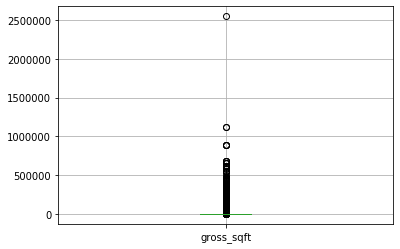

In [63]:
HP.boxplot(column='gross_sqft')

In [66]:
from scipy import stats
HP=HP[(np.abs(stats.zscore(HP)) < 3).all(axis=1)]

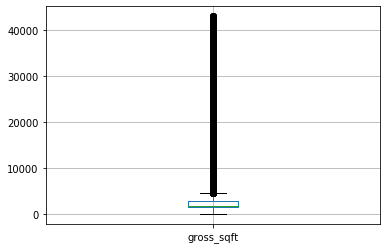

In [67]:
HP.boxplot(column='gross_sqft')

In [68]:
HP.shape

(202178, 52)

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

In [70]:
X = HP.drop('sale_price',axis=1)
y = HP['sale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

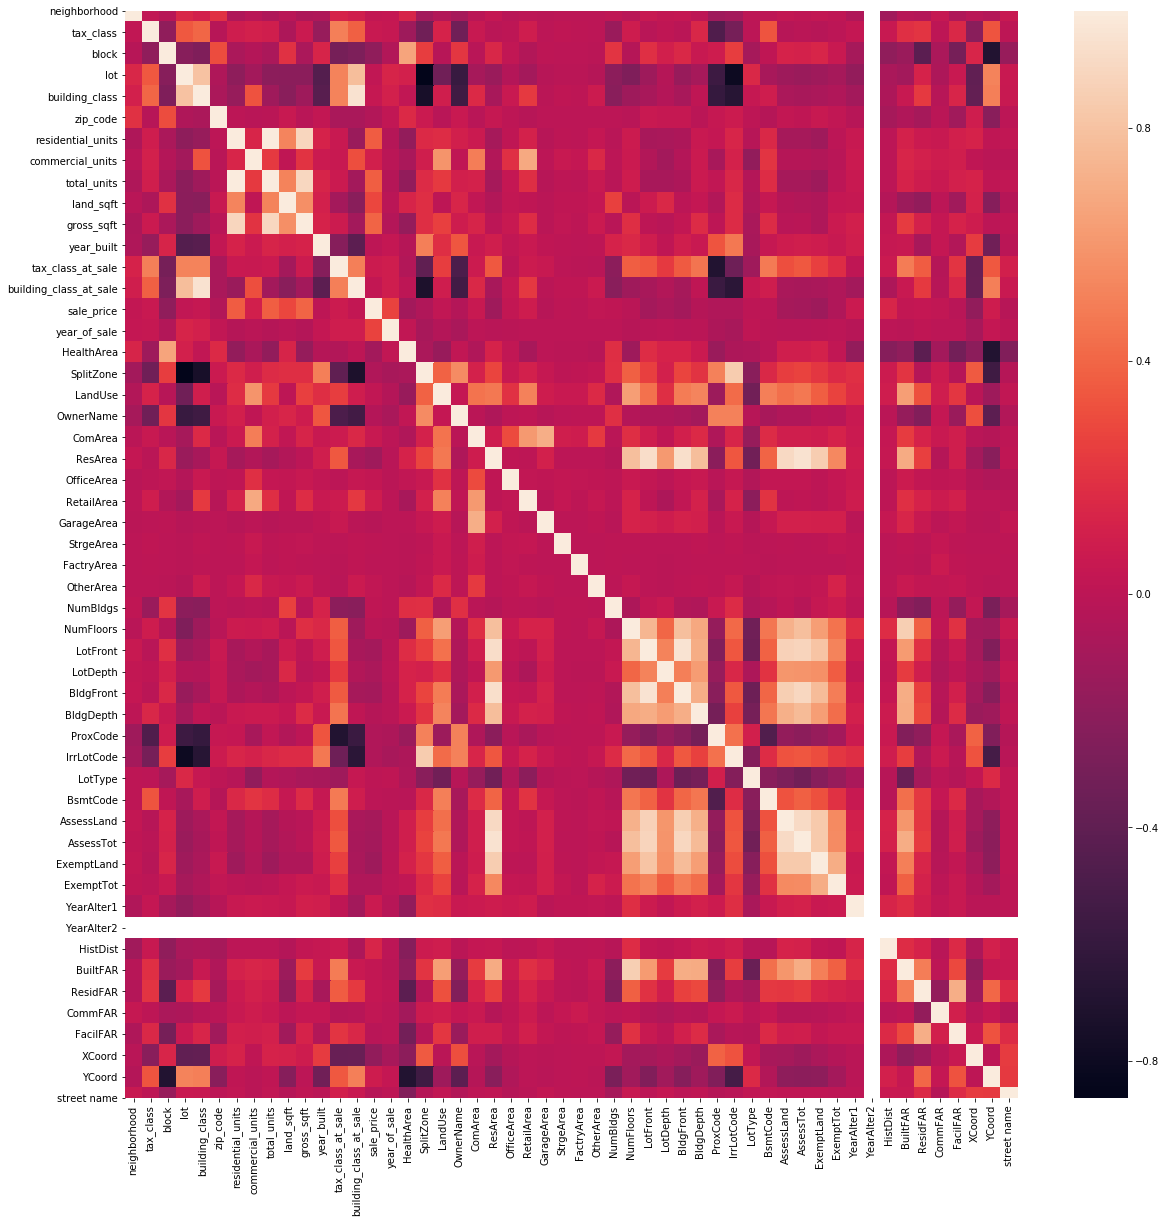

In [73]:
corr = HP.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr)

### Next we remove variables those are highly correlated by evaluating their Variable Inflation Factor. We remove one variable each step and again calculate the VIF and then remove the next. We remove all variables with VIF>5 by this way to minimize correlation among the variables. We show a few and the rest are done in a similar way.

In [75]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.6,neighborhood
1,3.2,tax_class
2,10.1,block
3,13.0,lot
4,30.9,building_class
5,193739.1,zip_code
6,34867.1,residential_units
7,252.2,commercial_units
8,36445.2,total_units
9,19.1,land_sqft


In [76]:
del HP['zip_code']

In [77]:
X = HP.drop('sale_price',axis=1)
y = HP['sale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.6,neighborhood
1,3.2,tax_class
2,10.0,block
3,13.0,lot
4,30.9,building_class
5,34867.0,residential_units
6,252.2,commercial_units
7,36445.1,total_units
8,19.1,land_sqft
9,16.4,gross_sqft


In [79]:
del HP['total_units']

In [80]:
columns = ['YearAlter2', 'XCoord', 'year_of_sale',  'YCoord', 'ComArea','LotDepth', 'LotType', 'NumFloors', 'LotFront', 'tax_class_at_sale', 'building_class', 'ResArea', 'SplitZone', 'BldgDepth', 'ResidFAR', 'LandUse', 'HealthArea', 'gross_sqft', 'BldgFront', 'year_built', 'IrrLotCode', 'AssessTot', 'land_sqft', 'FacilFAR', 'building_class_at_sale', 'NumBldgs']
HP.drop(columns, inplace=True, axis=1)

In [81]:
HP.columns.values

array(['neighborhood', 'tax_class', 'block', 'lot', 'residential_units',
       'commercial_units', 'sale_price', 'OwnerName', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'ProxCode', 'BsmtCode', 'AssessLand', 'ExemptLand', 'ExemptTot',
       'YearAlter1', 'HistDist', 'BuiltFAR', 'CommFAR', 'street name'],
      dtype=object)

In [83]:
HP.head()

,neighborhood,tax_class,block,lot,residential_units,commercial_units,sale_price,OwnerName,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,ProxCode,BsmtCode,AssessLand,ExemptLand,ExemptTot,YearAlter1,HistDist,BuiltFAR,CommFAR,street name
1131,27,2.0,5124,18,39,0,9450000.0,4184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,101250.0,0.0,0.0,2014.0,0,2.90,0.0,25893
1132,27,2.0,5124,45,38,0,9450000.0,4144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,85500.0,0.0,0.0,0.0,0,3.79,0.0,25893
1136,20,2.0,1206,31,41,0,9400000.0,1239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,127800.0,0.0,0.0,2015.0,0,4.19,0.0,23907
1137,9,1.0,274,28,2,0,9400000.0,3668,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,38370.0,0.0,0.0,2000.0,8,1.26,0.0,28848
1139,2,2.0,5979,46,0,0,9385000.0,78497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,290250.0,0.0,0.0,0.0,0,3.90,0.0,924


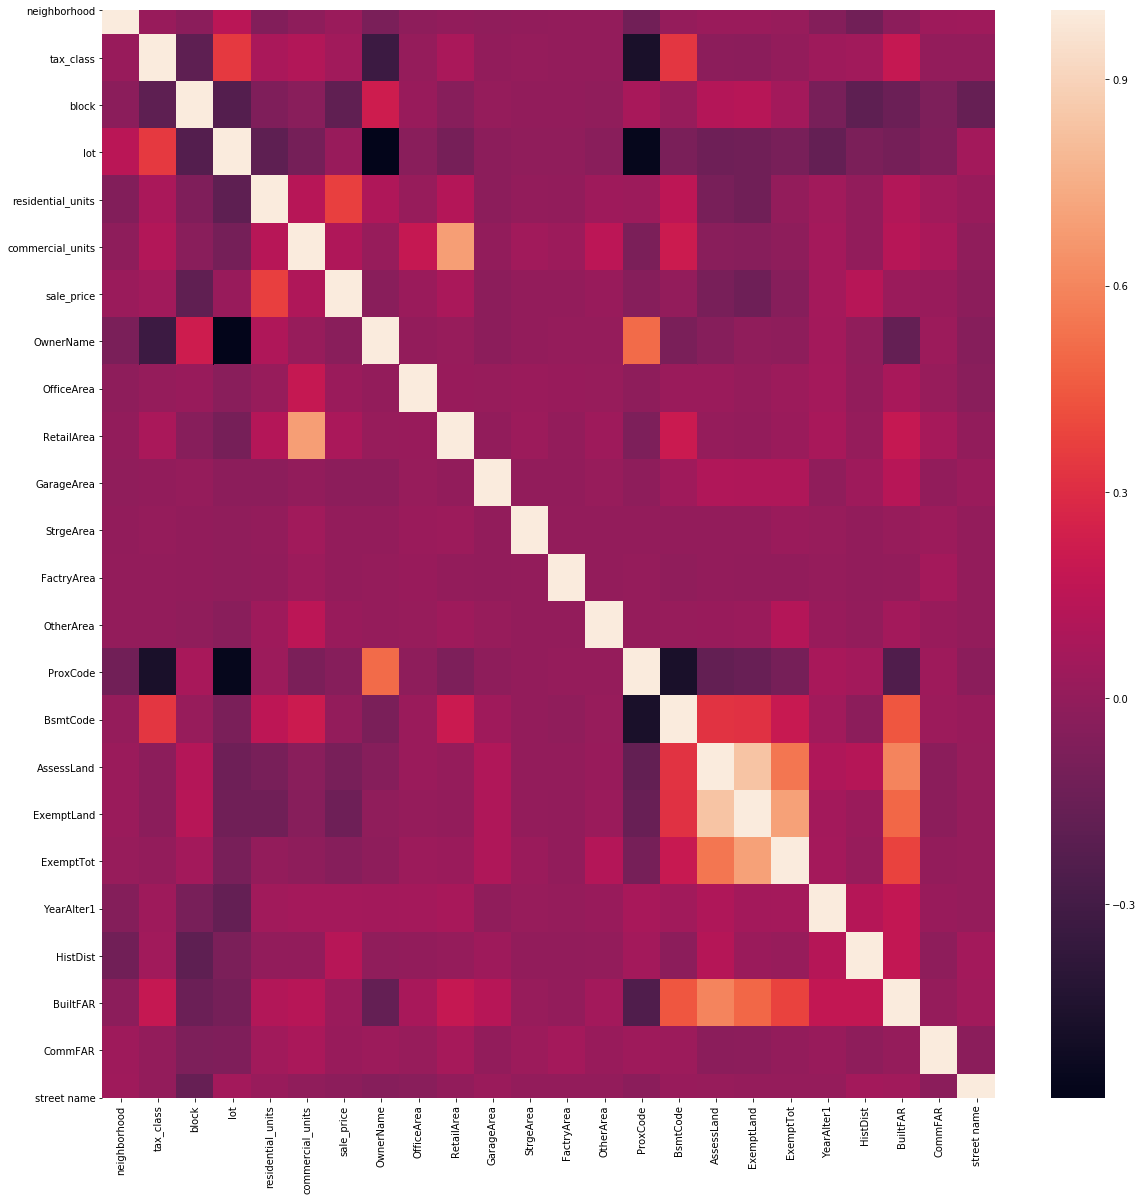

In [84]:
corr = HP.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr)

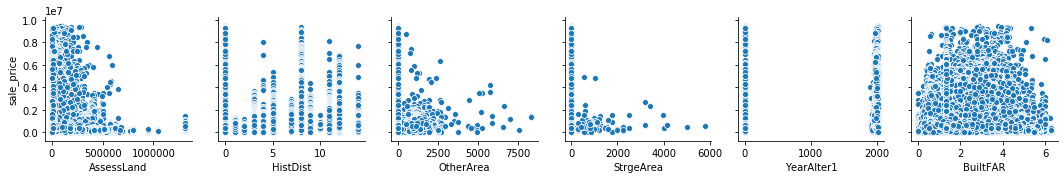

In [85]:
sns.pairplot(HP,y_vars=['sale_price'], x_vars=['AssessLand', 'HistDist', 'OtherArea', 'StrgeArea', 'YearAlter1', 'BuiltFAR'],palette='Dark2')

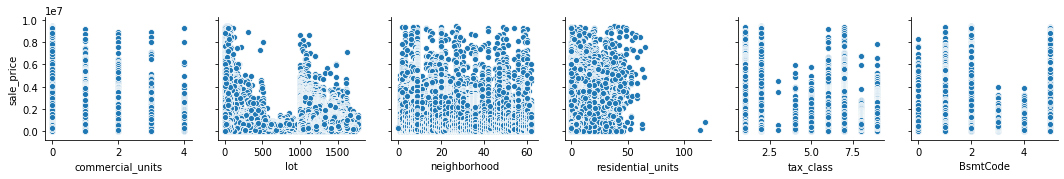

In [86]:
sns.pairplot(HP,y_vars=['sale_price'], x_vars=['commercial_units', 'lot', 'neighborhood', 'residential_units', 'tax_class', 'BsmtCode'],palette='Dark2')

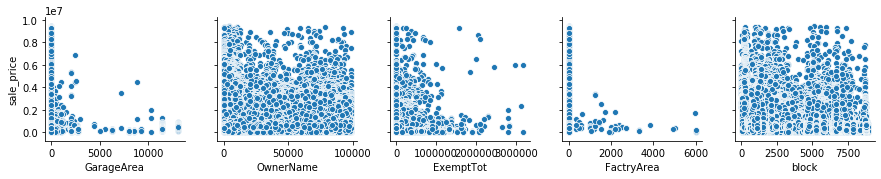

In [87]:
sns.pairplot(HP,y_vars=['sale_price'], x_vars=['GarageArea', 'OwnerName', 'ExemptTot', 'FactryArea', 'block'],palette='Dark2')

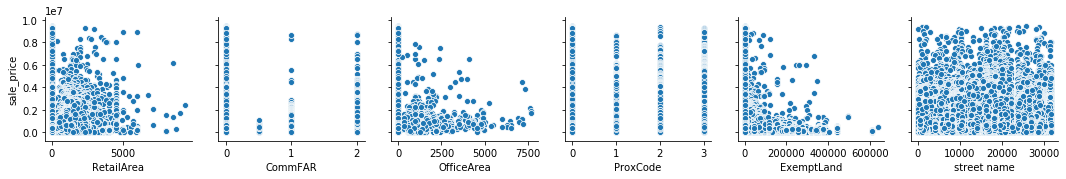

In [88]:
sns.pairplot(HP,y_vars=['sale_price'], x_vars=['RetailArea', 'CommFAR', 'OfficeArea', 'ProxCode', 'ExemptLand', 'street name'],palette='Dark2')

In [90]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import RFE

In [91]:
X = HP.drop('sale_price',axis=1)
y = HP['sale_price']

Xtrn, Xtest, Ytrn, Ytest = train_test_split(X,y,test_size=0.3, random_state=42)
models = [LinearRegression(), linear_model.Lasso(alpha=0.1), Ridge(alpha=100.0), RandomForestRegressor(n_estimators=100, max_features='sqrt'), KNeighborsRegressor(n_neighbors=6),DecisionTreeRegressor(max_depth=4), ensemble.GradientBoostingRegressor()]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
score on training 0.19581952550103798
r2 score 0.2023413572725158
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
score on training 0.19581952549941362
r2 score 0.2023413518205992
Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
score on training 0.19581908175480334
r2 score 0.2023354426768208
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=Fal

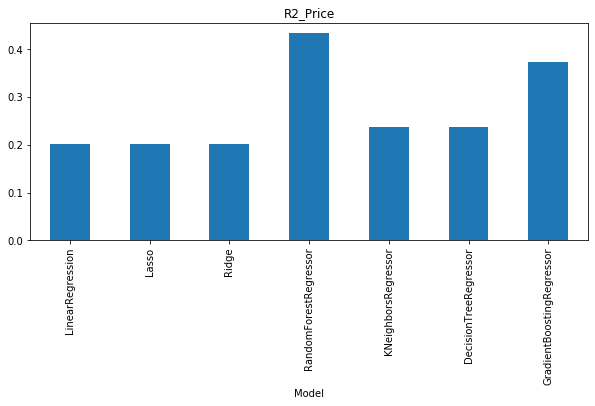

In [92]:
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
    print(model)
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    model.fit(Xtrn, Ytrn)
    tmp['R2_Price'] = r2_score(Ytest, model.predict(Xtest))
    print('score on training',model.score(Xtrn, Ytrn))
    print('r2 score',r2_score(Ytest, model.predict(Xtest)))
    TestModels = TestModels.append([tmp])  
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.R2_Price.plot(ax=axes, kind='bar', title='R2_Price')
plt.show()

In [93]:
HP.columns.values

array(['neighborhood', 'tax_class', 'block', 'lot', 'residential_units',
       'commercial_units', 'sale_price', 'OwnerName', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'ProxCode', 'BsmtCode', 'AssessLand', 'ExemptLand', 'ExemptTot',
       'YearAlter1', 'HistDist', 'BuiltFAR', 'CommFAR', 'street name'],
      dtype=object)

In [103]:
HP_list=list(HP.columns.values)
HP_list1=list(HP.columns.values)

names=HP_list1
feature_cols =['neighborhood', 'tax_class', 'block', 'lot', 'residential_units', 'commercial_units', 'OwnerName', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'ProxCode', 'BsmtCode', 'AssessLand', 'ExemptLand', 'ExemptTot',
       'YearAlter1', 'HistDist', 'BuiltFAR', 'CommFAR', 'street name']
target=['sale_price']
X=HP[feature_cols].dropna()
y=np.array(HP[target].dropna()).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [104]:
#use linear regression as the model
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)
#rank all features, i.e continue the elimination until the last one
rfe = RFE(model, n_features_to_select=10, step=1)
rfe.fit(X,y)
print('Features sorted by their rank:')
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Features sorted by their rank:
[(1, 'AssessLand'), (1, 'BsmtCode'), (1, 'ExemptLand'), (1, 'HistDist'), (1, 'YearAlter1'), (1, 'block'), (1, 'lot'), (1, 'neighborhood'), (1, 'residential_units'), (1, 'tax_class'), (2, 'CommFAR'), (3, 'commercial_units'), (4, 'sale_price'), (5, 'ExemptTot'), (6, 'OtherArea'), (7, 'BuiltFAR'), (8, 'OfficeArea'), (9, 'OwnerName'), (10, 'ProxCode'), (11, 'RetailArea'), (12, 'FactryArea'), (13, 'GarageArea'), (14, 'StrgeArea')]


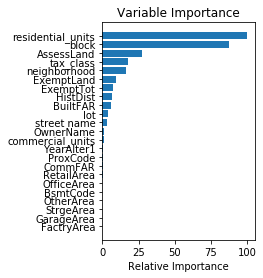

In [105]:
# Plot feature importance
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [106]:
columns = ['OfficeArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'BsmtCode', 'CommFAR']
HP.drop(columns, inplace=True, axis=1)

In [107]:
HP.head()

,neighborhood,tax_class,block,lot,residential_units,commercial_units,sale_price,OwnerName,RetailArea,ProxCode,AssessLand,ExemptLand,ExemptTot,YearAlter1,HistDist,BuiltFAR,street name
1131,27,2.0,5124,18,39,0,9450000.0,4184,0.0,0.0,101250.0,0.0,0.0,2014.0,0,2.90,25893
1132,27,2.0,5124,45,38,0,9450000.0,4144,0.0,0.0,85500.0,0.0,0.0,0.0,0,3.79,25893
1136,20,2.0,1206,31,41,0,9400000.0,1239,0.0,0.0,127800.0,0.0,0.0,2015.0,0,4.19,23907
1137,9,1.0,274,28,2,0,9400000.0,3668,0.0,2.0,38370.0,0.0,0.0,2000.0,8,1.26,28848
1139,2,2.0,5979,46,0,0,9385000.0,78497,0.0,0.0,290250.0,0.0,0.0,0.0,0,3.90,924
